In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [36]:
s = np.array([1,2,3,4,5,6,7,8,9,10])
a = np.arange(1,11)

In [37]:
print(s)
print(a)

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]


In [38]:
result = s*a

In [5]:
print(result)

[  1   4   9  16  25  36  49  64  81 100]


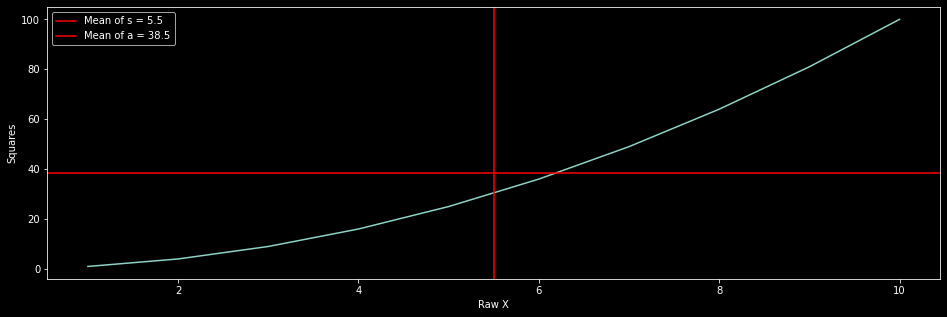

In [44]:
plt.style.use('dark_background')
plt.figure(figsize=(16,5))
plt.plot(s,result)
plt.axvline(s.mean(), color='red', label = f'Mean of s = {s.mean()}')
plt.axhline(result.mean(), color = 'red', label = f'Mean of a = {result.mean()}')
plt.legend()
plt.xlabel('Raw X')
plt.ylabel('Squares')
plt.show()

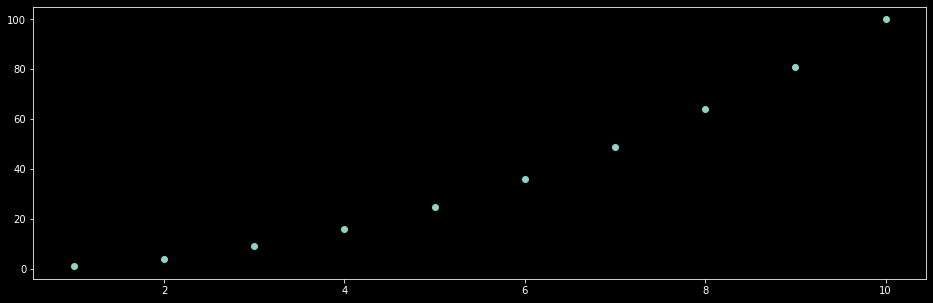

In [7]:
plt.style.use('dark_background')
plt.figure(figsize=(16,5))
plt.scatter(s,result)
plt.show()

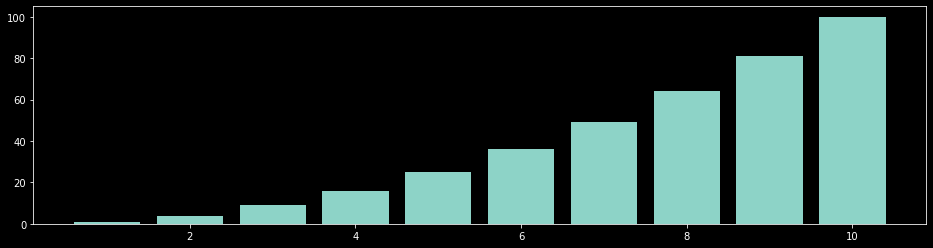

In [8]:
plt.figure(figsize=(16,4))
plt.bar(s,result)
plt.show()

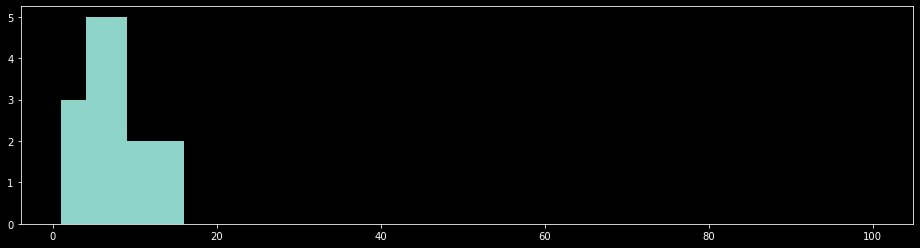

In [9]:
plt.figure(figsize=(16,4))
plt.hist(s,result)
plt.show()

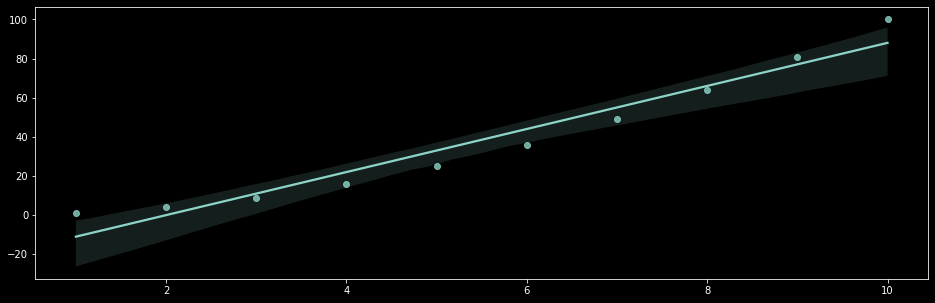

In [47]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
sns.regplot(s,result)
plt.grid(False)
plt.show()

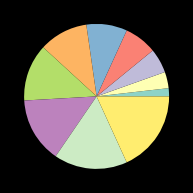

In [11]:
plt.figure(dpi=60)
plt.pie(s)
plt.show()

<AxesSubplot:>

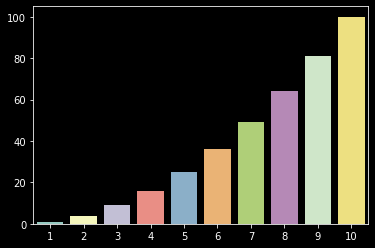

In [12]:
sns.barplot(x=s, y=result)

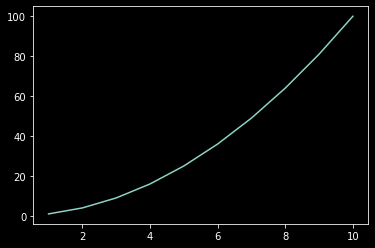

In [13]:
sns.lineplot(x=s, y=result)
plt.grid(False)

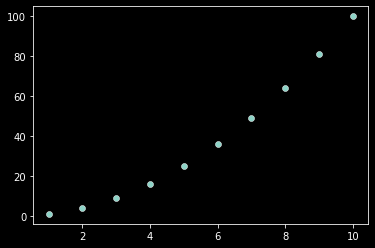

In [14]:
sns.scatterplot(x=s, y=result)
plt.grid(False)

In [15]:
l = [1,2,3,4,5,5]
f = [10,20,30,l]
print(l)
print(f)

[1, 2, 3, 4, 5, 5]
[10, 20, 30, [1, 2, 3, 4, 5, 5]]


In [16]:
for i in f:
    print(i)

10
20
30
[1, 2, 3, 4, 5, 5]


In [17]:
print(f[3][1])

2


In [18]:
d = {
    'Name': 'Sahil',
    'Age': 18,
    'College': 'SSIPMT',
    'Year': 3
    
}

In [19]:
d.keys()

dict_keys(['Name', 'Age', 'College', 'Year'])

In [20]:
dict_keys = d.keys()

In [21]:
print(dict_keys)

dict_keys(['Name', 'Age', 'College', 'Year'])


In [22]:
list(dict_keys)

['Name', 'Age', 'College', 'Year']

In [23]:
dict_values = list(d.values())

In [24]:
print(dict_values)

['Sahil', 18, 'SSIPMT', 3]


In [25]:
 a= np.array([10, 11])

In [26]:
print(a)

[10 11]


In [27]:
for i in range(1,6):
    print("* " * i)

* 
* * 
* * * 
* * * * 
* * * * * 


In [28]:
for i in range(5,1,-1):
    print()

In [29]:
def pattern(n):
    for i i

SyntaxError: invalid syntax (Temp/ipykernel_8404/4136820068.py, line 2)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset.
csv_file = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/air-quality/AirQualityUCI.csv'
df = pd.read_csv(csv_file, sep=';')

# Dropping the 'Unnamed: 15' & 'Unnamed: 16' columns.
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], axis=1) 

# Dropping the null values.
df = df.dropna()

# Creating a Pandas series containing 'datetime' objects.
dt_series = pd.Series(data = [item.split("/")[2] + "-" + item.split("/")[1] + "-" + item.split("/")[0] for item in df['Date']], index=df.index) + ' ' + pd.Series(data=[str(item).replace(".", ":") for item in df['Time']], index=df.index)
dt_series = pd.to_datetime(dt_series)

# Remove the Date & Time columns from the DataFrame and insert the 'dt_series' in it.
df = df.drop(columns=['Date', 'Time'], axis=1)
df.insert(loc=0, column='DateTime', value=dt_series)

# Get the Pandas series containing the year values as integers.
year_series = dt_series.dt.year

# Get the Pandas series containing the month values as integers.
month_series = dt_series.dt.month

# Get the Pandas series containing the day values as integers.
day_series = dt_series.dt.day

# Get the Pandas series containing the days of a week, i.e., Monday, Tuesday, Wednesday etc.
day_name_series = dt_series.dt.day_name()

# Add the 'Year', 'Month', 'Day' and 'Day Name' columns to the DataFrame.
df['Year'] = year_series
df['Month'] = month_series
df['Day'] = day_series
df['Day Name'] = day_name_series

# Sort the DataFrame by the 'DateTime' values in the ascending order. Also, display the first 10 rows of the DataFrame.
df = df.sort_values(by='DateTime')

# Create a function to replace the commas with periods in a Pandas series.
def comma_to_period(series):
    new_series = pd.Series(data=[float(str(item).replace(',', '.')) for item in series], index=df.index)
    return new_series

# Apply the 'comma_to_period()' function on the ''CO(GT)', 'C6H6(GT)', 'T', 'RH' and 'AH' columns.
cols_to_correct = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'] # Create a list of column names.
for col in cols_to_correct: # Iterate through each column
    df[col] = comma_to_period(df[col]) # Replace the original column with the new series.

# Remove all the columns from the 'df' DataFrame containing more than 10% garbage value.
df = df.drop(columns=['NMHC(GT)', 'CO(GT)', 'NOx(GT)', 'NO2(GT)'], axis=1)

# Create a new DataFrame containing records for the years 2004 and 2005.
aq_2004_df = df[df['Year'] == 2004]
aq_2005_df = df[df['Year'] == 2005]

# Replace the -200 value with the median values for each column having indices between 1 and -4 (excluding -4) for the 2004 year DataFrame.
for col in aq_2004_df.columns[1:-4]:
  median = aq_2004_df.loc[aq_2004_df[col] != -200, col].median()
  aq_2004_df[col] = aq_2004_df[col].replace(to_replace=-200, value=median)

# Repeat the same exercise for the 2005 year DataFrame.
for col in aq_2005_df.columns[1:-4]:
  median = aq_2005_df.loc[aq_2005_df[col] != -200, col].median()
  aq_2005_df[col] = aq_2005_df[col].replace(to_replace=-200, value=median)

# Group the DataFrames about the 'Month' column.
group_2004_month = aq_2004_df.groupby(by='Month')
group_2005_month = aq_2005_df.groupby(by='Month')

# Concatenate the two DataFrames for 2004 and 2005 to obtain one DataFrame.
df = pd.concat([aq_2004_df, aq_2005_df])

# Information of the DataFrame.
df.info()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
corr_df = df.iloc[:, 1:-4].corr()
plt.figure(figsize=(15,6), dpi = 100)
sns.heatmap(data = corr_df, annot=True)
plt.show()

In [ ]:
plt.figure(figsize=(16,5))
plt.scatter(df['T'], df['RH'])
plt.show()

In [ ]:
plt.figure(figsize=(16,5))
sns.regplot(df['T'], df['RH'])
plt.show()

In [32]:
from ipywidgets import interactive


In [33]:
def simulate_straight_lines(slope, intercept):
    plt.figure(figsize=(16,5))
    x = np.arange(df['T'].min()-10, df['T'].max()+10)
    plt.plot(x, slope*x+intercept)
    plt.scatter(df['T'], df['RH'])
    plt.axhline(y=0, color = 'red', label = 'y=0')
    plt.axvline(x=0, color='red', label = 'x=0')
    plt.legend()
    plt.show()

interactive_plot = interactive(simulate_straight_lines, slope=(-2,0,0.1),intercept = (-100,100,2))
interactive_plot


interactive(children=(FloatSlider(value=-1.0, description='slope', max=0.0, min=-2.0), IntSlider(value=0, desc…

<Figure size 1152x360 with 0 Axes>